# Auswertung
## Lade Daten

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
#from scipy.interpolate import interp1d

In [2]:
#axisArr60, _, integralMatrix60, errorMatrixAbsolut60, errorMatrixRelativ60 = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_500_3020_60.npy')[0]
#axisArr100, _, integralMatrix100, errorMatrixAbsolut100, errorMatrixRelativ100 = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_500_3000_100.npy')[0]
#axisArr80, _, integralMatrix80, errorMatrixAbsolut80, errorMatrixRelativ80 = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_500_2900_80.npy')[0]
#axisArr1, _, integralMatrix4, errorMatrixAbsolut4, errorMatrixRelativ4 = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_1200_1300_1.npy')[0]
axisArr1, _, integralMatrix1, errorMatrixAbsolut1, errorMatrixRelativ1 = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_600_2000_1.npy')[0]
axisArr10, _, integralMatrix10Tmp, errorMatrixAbsolut10Tmp, errorMatrixRelativ10Tmp = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_500_2100_10.npy')[0]
axisArr20, onlyfiles, integralMatrix20Tmp, errorMatrixAbsolut20Tmp, errorMatrixRelativ20Tmp = np.load('Fehler_bei_unterschiedlicher_Masse_Auswertung_500_3000_20.npy')[0]

In [3]:
nmbWaves = len(integralMatrix10Tmp)

indexMin, indexMax = np.argwhere(axisArr10==axisArr1[0])[0][0], np.argwhere(axisArr10==axisArr1[-1])[0][0] 
axisArr10 = axisArr10[indexMin:indexMax+1]
integralMatrix10 = np.zeros((nmbWaves, nmbWaves, indexMax-indexMin+1), dtype=np.complex128)
errorMatrixAbsolut10 = np.zeros((nmbWaves, nmbWaves, indexMax-indexMin+1), dtype=np.complex128)
for i in range(0, nmbWaves):
    for j in range(0, nmbWaves):
        integralMatrix10[i,j] = integralMatrix10Tmp[i,j][indexMin:indexMax+1]
        errorMatrixAbsolut10[i,j] = errorMatrixAbsolut10Tmp[i,j][indexMin:indexMax+1]

indexMin, indexMax = np.argwhere(axisArr20==axisArr1[0])[0][0], np.argwhere(axisArr20==axisArr1[-1])[0][0] 
axisArr20 = axisArr20[indexMin:indexMax+1]
integralMatrix20 = np.zeros((nmbWaves, nmbWaves, indexMax-indexMin+1), dtype=np.complex128)
errorMatrixAbsolut20 = np.zeros((nmbWaves, nmbWaves, indexMax-indexMin+1), dtype=np.complex128)
for i in range(0, nmbWaves):
    for j in range(0, nmbWaves):
        integralMatrix20[i,j] = integralMatrix20Tmp[i,j][indexMin:indexMax+1]
        errorMatrixAbsolut20[i,j] = errorMatrixAbsolut20Tmp[i,j][indexMin:indexMax+1]

## Plotte Daten
1. Integralwerte
2. Absolute Fehler
3. Relative Fehler

## Berechnung der Daten durch Summation von feineres Binning

In [5]:
def calcMatrixFromFineToRough(origAxisArr, origRootMatrix, origErrorMatrix, nmb):  
    #if nmb%2 == 0:
    matrixInterpoliert = np.zeros(len(origRootMatrix)/nmb)
    matrixErrorAbsolut = np.zeros(len(origRootMatrix)/nmb)
    axisArr = origAxisArr[:-1]
    for k in range(0, len(origRootMatrix)/nmb):
        tmp = 0
        for l in range(0, nmb):
            tmp += origRootMatrix[nmb*k+l]
        matrixInterpoliert[k] = tmp/nmb
        matrixErrorAbsolut[k] = np.std(origErrorMatrix[nmb*k:nmb*k+nmb-1])/math.sqrt(nmb)
    '''      
    else:
        matrixInterpoliert = np.zeros(len(matrix20[i,j])/nmb-1)
        axisArr = origAxisArr[1:-1]
        for k in range(1, len(matrix20[i,j])/nmb):
            tmp = 0
            for l in range(-(nmb-1)/2, (nmb+1)/2):
                tmp += origMatrix[i,j][nmb*k+l].real
            matrixInterpoliert[k-1] = tmp/nmb
    '''
    return axisArr, matrixInterpoliert, matrixErrorAbsolut

### Grundlage 1 MeV Bin

9 8
[1-,1+,0+]=[f0_980_0=[pi-[0,0]pi+][1,0]pi-]_eventFileId-0_2.root
[1-,1+,0+]=[f0980FlatteBesII[f0_980_0]=[pi-[0,0]pi+][1,0]pi-]_eventFileId-0_2.root


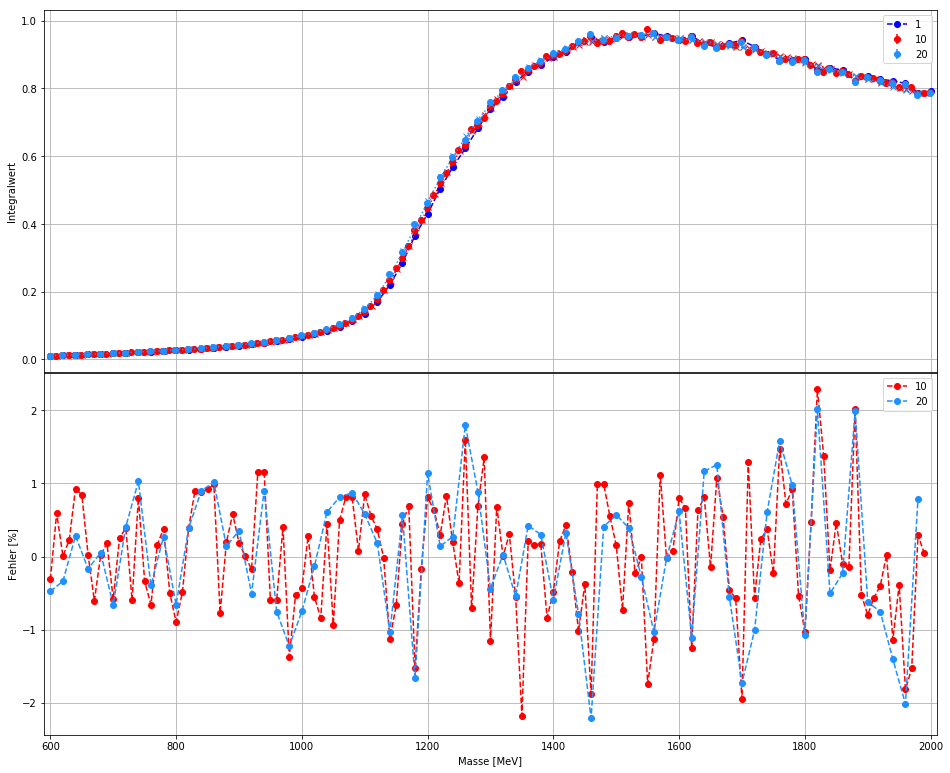

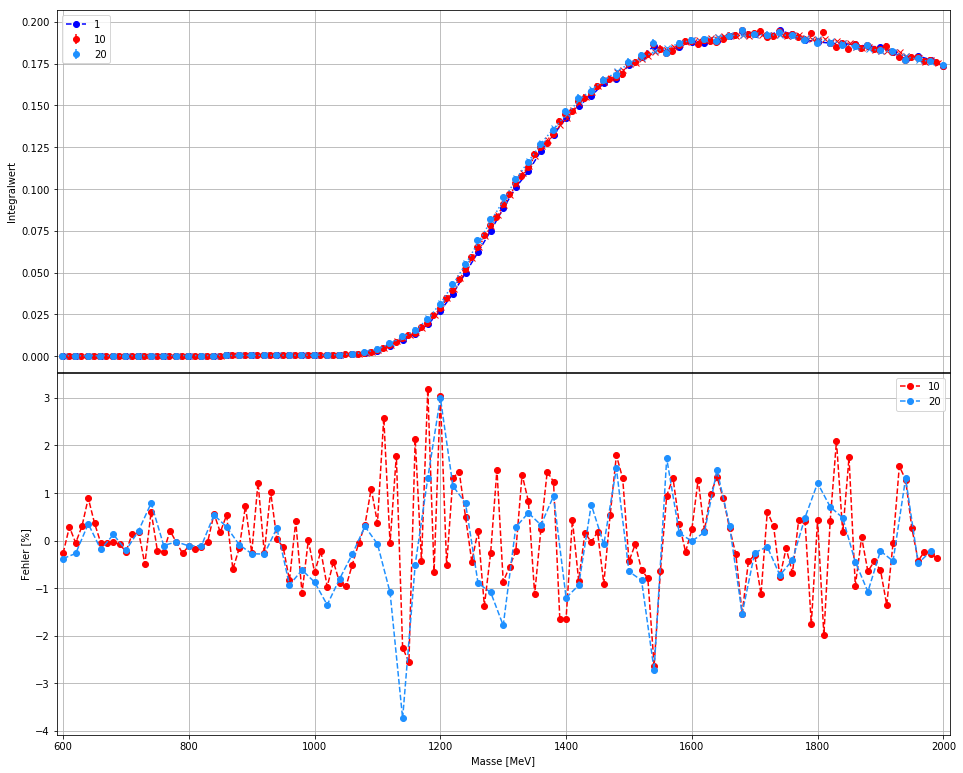

In [54]:
matrix1 = integralMatrix1
matrix10 = integralMatrix10
matrix20 = integralMatrix20


xmin = min(axisArr1)-10; xmax = max(axisArr1)+10
#xmin = 400; xmax = 1900


for i in range(9,10):#len(errorMatrixAbsolut)):
    for j in range(8,9):# i+1):
        print i, j
        print onlyfiles[i]
        print onlyfiles[j]

        f = plt.figure(figsize=(16,20))
        plt.subplots_adjust(hspace=0.001)

        ax1 = plt.subplot(311)
        ax1.grid(True)     
        ax1.set_xlim(xmin, xmax)
        #ax1.set_xticks([])
        ax1.set_ylabel('Integralwert')

        axisArr20Interpoliert, matrix20Interpoliert, matrix20ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr20, matrix1[i,j].real, errorMatrixAbsolut1[i,j].real, 20)
        axisArr10Interpoliert, matrix10Interpoliert, matrix10ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr10, matrix1[i,j].real, errorMatrixAbsolut1[i,j].real, 10)
        
        
        ax1.plot(axisArr1[::20],  matrix1[i][j][::20].real,  'o--', color='blue', label='1')
        ax1.errorbar(axisArr10-1,  matrix10[i][j].real,  marker='o', linestyle='None', yerr = errorMatrixAbsolut10[i,j].real, color='red', label='10')
        ax1.errorbar(axisArr10Interpoliert+1,  matrix10Interpoliert,  marker='x', linestyle=':', yerr = matrix10ErrorAbsolutInterpoliert, color='red');

        ax1.errorbar(axisArr20-1,  matrix20[i,j].real, marker='o', linestyle = 'None', yerr = errorMatrixAbsolut20[i,j].real, color='dodgerblue', label='20')
        ax1.errorbar(axisArr20Interpoliert+1,  matrix20Interpoliert,  marker = 'x', linestyle = ':', yerr = matrix20ErrorAbsolutInterpoliert, color='dodgerblue');
        ax1.legend()



        ax2 = plt.subplot(312, sharex=ax1)
        ax2.grid(True)
        ax2.set_xlim(xmin, xmax)
        ax2.set_xlabel('Masse [MeV]')
        ax2.set_ylabel('Fehler [%]')
        ax2.plot(axisArr10Interpoliert, 100 * (matrix10Interpoliert - matrix10[i,j][:-1].real)/matrix10[i,j][:-1].real, 'o--', color='red', label='10')
        ax2.plot(axisArr20Interpoliert, 100 * (matrix20Interpoliert - matrix20[i,j][:-1].real)/matrix20[i,j][:-1].real, 'o--', color='dodgerblue', label='20')
        ax2.legend()

        xticklabels = ax1.get_xticklabels()
        plt.setp(xticklabels, visible=False)
        plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "_Real_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
        plt.show()

        
        if i != j:
            f = plt.figure(figsize=(16,20))
            plt.subplots_adjust(hspace=0.001)

            ax1 = plt.subplot(311)
            ax1.grid(True)     
            ax1.set_xlim(xmin, xmax)
            #ax1.set_xticks([])
            ax1.set_ylabel('Integralwert')

            axisArr20Interpoliert, matrix20Interpoliert, matrix20ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr20, matrix1[i,j].imag, errorMatrixAbsolut1[i,j].imag, 20)
            axisArr10Interpoliert, matrix10Interpoliert, matrix10ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr10, matrix1[i,j].imag, errorMatrixAbsolut1[i,j].imag, 10)

            ax1.plot(axisArr1[::20],  matrix1[i][j][::20].imag,  'o--', color='blue', label='1')
            ax1.errorbar(axisArr10-1,  matrix10[i][j].imag,  marker='o', linestyle='None', yerr = errorMatrixAbsolut10[i,j].imag, color='red', label='10')
            ax1.errorbar(axisArr10Interpoliert+1,  matrix10Interpoliert,  marker='x', linestyle=':', yerr = matrix10ErrorAbsolutInterpoliert, color='red');

            ax1.errorbar(axisArr20-1,  matrix20[i,j].imag, marker='o', linestyle = 'None', yerr = errorMatrixAbsolut20[i,j].imag, color='dodgerblue', label='20')
            ax1.errorbar(axisArr20Interpoliert+1,  matrix20Interpoliert,  marker = 'x', linestyle = ':', yerr = matrix20ErrorAbsolutInterpoliert, color='dodgerblue');
            ax1.legend()



            ax2 = plt.subplot(312, sharex=ax1)
            ax2.grid(True)
            ax2.set_xlim(xmin, xmax)
            ax2.set_xlabel('Masse [MeV]')
            ax2.set_ylabel('Fehler [%]')
            ax2.plot(axisArr10Interpoliert, 100 * (matrix10Interpoliert - matrix10[i,j][:-1].imag)/matrix10[i,j][:-1].imag, 'o--', color='red', label='10')
            ax2.plot(axisArr20Interpoliert, 100 * (matrix20Interpoliert - matrix20[i,j][:-1].imag)/matrix20[i,j][:-1].imag, 'o--', color='dodgerblue', label='20')
            ax2.legend()

            xticklabels = ax1.get_xticklabels()
            plt.setp(xticklabels, visible=False)
            plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "_Imag_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
            plt.show()




5 5
[1-,0-,0+]=[piPiSWaveAuMorganPenningtonKachaev[sigma0]=[pi-[0,0]pi+][0,0]pi-]_eventFileId-0_2.root
[1-,0-,0+]=[piPiSWaveAuMorganPenningtonKachaev[sigma0]=[pi-[0,0]pi+][0,0]pi-]_eventFileId-0_2.root


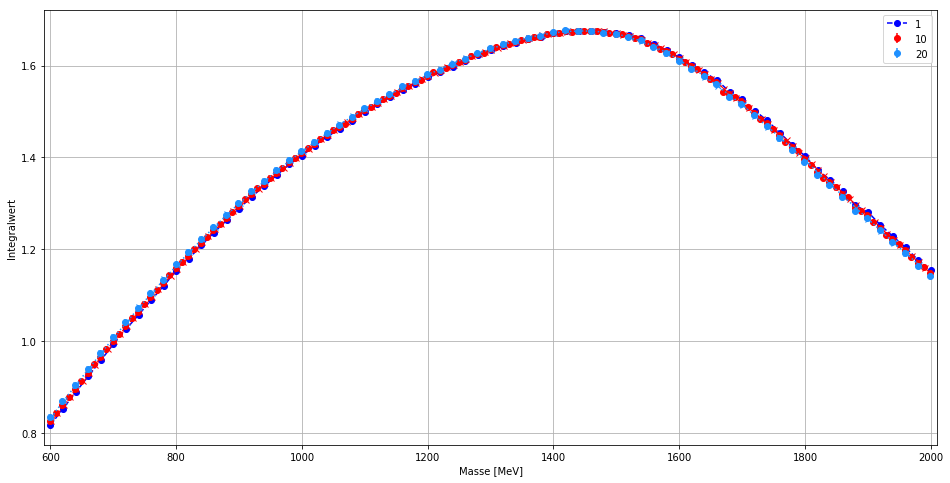

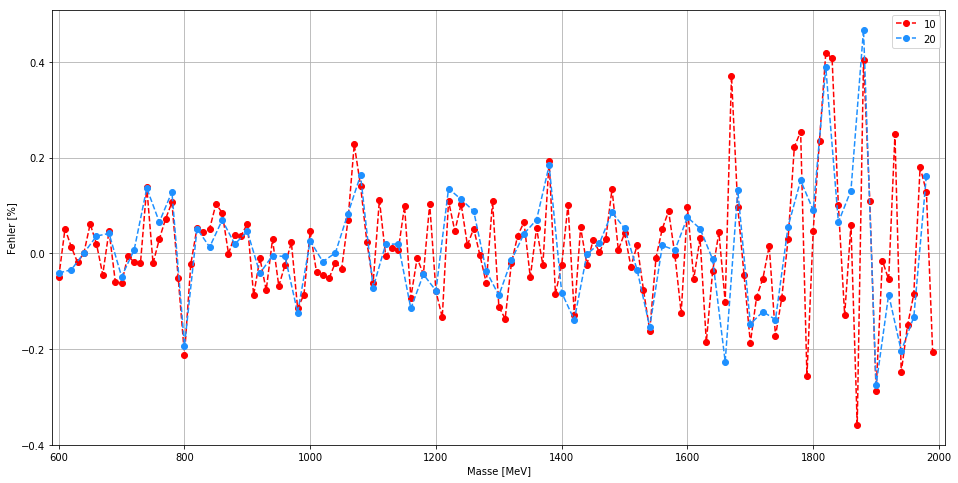

In [72]:
matrix1 = integralMatrix1
matrix10 = integralMatrix10
matrix20 = integralMatrix20


xmin = min(axisArr1)-10; xmax = max(axisArr1)+10
#xmin = 400; xmax = 1900


for i in range(5,6):#len(errorMatrixAbsolut)):
    for j in range(5,6):# i+1):
        print i, j
        print onlyfiles[i]
        print onlyfiles[j]
        dirName = "TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "/"
        if not os.path.exists(dirName):
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ")
        else:    
            print("Directory " , dirName ,  " already exists")

        f = plt.figure(figsize=(16,8))
        plt.subplots_adjust(hspace=0.001)

        ax1 = plt.subplot(111)
        ax1.grid(True)     
        ax1.set_xlim(xmin, xmax)
        #ax1.set_xticks([])
        ax1.set_ylabel('Integralwert')
        ax1.set_xlabel('Masse [MeV]')
        axisArr20Interpoliert, matrix20Interpoliert, matrix20ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr20, matrix1[i,j].real, errorMatrixAbsolut1[i,j].real, 20)
        axisArr10Interpoliert, matrix10Interpoliert, matrix10ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr10, matrix1[i,j].real, errorMatrixAbsolut1[i,j].real, 10)
        
        
        ax1.plot(axisArr1[::20],  matrix1[i][j][::20].real,  'o--', color='blue', label='1')
        ax1.errorbar(axisArr10-1,  matrix10[i][j].real,  marker='o', linestyle='None', yerr = errorMatrixAbsolut10[i,j].real, color='red', label='10')
        ax1.errorbar(axisArr10Interpoliert+1,  matrix10Interpoliert,  marker='x', linestyle=':', yerr = matrix10ErrorAbsolutInterpoliert, color='red');

        ax1.errorbar(axisArr20-1,  matrix20[i,j].real, marker='o', linestyle = 'None', yerr = errorMatrixAbsolut20[i,j].real, color='dodgerblue', label='20')
        ax1.errorbar(axisArr20Interpoliert+1,  matrix20Interpoliert,  marker = 'x', linestyle = ':', yerr = matrix20ErrorAbsolutInterpoliert, color='dodgerblue');
        ax1.legend()
        plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "/" + str(i) + str(j) + "_Real_Value_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
        plt.show()

        
        f = plt.figure(figsize=(16,8))
        ax2 = plt.subplot(111, sharex=ax1)
        ax2.grid(True)
        ax2.set_xlim(xmin, xmax)
        ax2.set_xlabel('Masse [MeV]')
        ax2.set_ylabel('Fehler [%]')
        ax2.plot(axisArr10Interpoliert, 100 * (matrix10Interpoliert - matrix10[i,j][:-1].real)/matrix10[i,j][:-1].real, 'o--', color='red', label='10')
        ax2.plot(axisArr20Interpoliert, 100 * (matrix20Interpoliert - matrix20[i,j][:-1].real)/matrix20[i,j][:-1].real, 'o--', color='dodgerblue', label='20')
        ax2.legend()

        xticklabels = ax1.get_xticklabels()
        plt.setp(xticklabels, visible=False)
        plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "/" + str(i) + str(j) + "_Real_Error_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
        plt.show()

        
        if i != j:
            f = plt.figure(figsize=(16,8))
            plt.subplots_adjust(hspace=0.001)

            ax1 = plt.subplot(111)
            ax1.grid(True)     

            ax1.set_xlim(xmin, xmax)
            #ax1.set_xticks([])
            ax1.set_ylabel('Integralwert')
            ax1.set_xlabel('Masse [MeV]')

            axisArr20Interpoliert, matrix20Interpoliert, matrix20ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr20, matrix1[i,j].imag, errorMatrixAbsolut1[i,j].imag, 20)
            axisArr10Interpoliert, matrix10Interpoliert, matrix10ErrorAbsolutInterpoliert = calcMatrixFromFineToRough(axisArr10, matrix1[i,j].imag, errorMatrixAbsolut1[i,j].imag, 10)

            ax1.plot(axisArr1[::20],  matrix1[i][j][::20].imag,  'o--', color='blue', label='1')
            ax1.errorbar(axisArr10-1,  matrix10[i][j].imag,  marker='o', linestyle='None', yerr = errorMatrixAbsolut10[i,j].imag, color='red', label='10')
            ax1.errorbar(axisArr10Interpoliert+1,  matrix10Interpoliert,  marker='x', linestyle=':', yerr = matrix10ErrorAbsolutInterpoliert, color='red');

            ax1.errorbar(axisArr20-1,  matrix20[i,j].imag, marker='o', linestyle = 'None', yerr = errorMatrixAbsolut20[i,j].imag, color='dodgerblue', label='20')
            ax1.errorbar(axisArr20Interpoliert+1,  matrix20Interpoliert,  marker = 'x', linestyle = ':', yerr = matrix20ErrorAbsolutInterpoliert, color='dodgerblue');
            ax1.legend()
            plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "/" + str(i) + str(j) + "_Imag_Value_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
            plt.show()

            f = plt.figure(figsize=(16,8))
            ax2 = plt.subplot(111, sharex=ax1)
            ax2.grid(True)
            ax2.set_xlim(xmin, xmax)
            ax2.set_xlabel('Masse [MeV]')
            ax2.set_ylabel('Fehler [%]')
            ax2.plot(axisArr10Interpoliert, 100 * (matrix10Interpoliert - matrix10[i,j][:-1].imag)/matrix10[i,j][:-1].imag, 'o--', color='red', label='10')
            ax2.plot(axisArr20Interpoliert, 100 * (matrix20Interpoliert - matrix20[i,j][:-1].imag)/matrix20[i,j][:-1].imag, 'o--', color='dodgerblue', label='20')
            ax2.legend()

            xticklabels = ax1.get_xticklabels()
            plt.setp(xticklabels, visible=False)
            plt.savefig("TK Eigene Plots/SummationBinning/" + str(i) + str(j) + "/" + str(i) + str(j) + "_Imag_Error_" + onlyfiles[i] + "_" + onlyfiles[j] + ".png",bbox_inches='tight')
            plt.show()


